# Tokenization Experiment

## 1. Import Necessary Libraries and Packages

In [1]:
# %pip install transformers torch datasets seaborn
# %pip install seaborn

In [2]:
# Import necessary libraries
from transformers import AutoTokenizer, AutoModel

/Users/juliusbijkerk/Downloads/LoLaTokenization-main-2/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/juliusbijkerk/Downloads/LoLaTokenization-main-2/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Load Model with Default Tokenizer and Vocabulary

In [3]:
# Specify model to load from Hugging Face
model_name = "bert-base-uncased" 

# Load tokenizer: vocabulary and tokenization function
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load model
model = AutoModel.from_pretrained(model_name)

# Extract vocabulary from tokenizer
vocab = tokenizer.get_vocab()

## 3. Inspect Vocabulary

In [4]:
# Expected size of vocabulary V = 30522
print("Vocabulary size:", len(vocab))

# Some examples of vocabulary items
print("Sample vocabulary items:")
for item in list(vocab.items())[:10]:
    print(item)

Vocabulary size: 30522
Sample vocabulary items:
('##bane', 27543)
('##lez', 28060)
('tod', 28681)
('stills', 26105)
('illusion', 12492)
('totally', 6135)
('##hema', 28433)
('coincide', 19680)
('[unused599]', 604)
('commonly', 4141)


## 4. Define Custom Tokenization Function

### Define tokenization function: based on whitespace

In [10]:
from typing import Union, Tuple, List

def unigram_tokenizer(premise_hypothesis: Union[Tuple[str, str], List[str]], separator_marker: str="", special_space_token: str="") -> Tuple[List[str], List[str]]:
    """
    Tokenizes a premise-hypothesis pair from input text into unigrams (single words).

    Args:
        premise_hypothesis (Union[Tuple[str, str], List[str]]): The premise and hypothesis text to tokenize.
        separator_marker (str): The separator marker to use for separating tokens. Defaults to an empty string.
        special_space_token (str): The special space token to use for separating tokens. Defaults to an empty string.

    Returns:
        Tuple[List[str], List[str]]: The tokenized premise and hypothesis text

    """
    def _tokenize_unigrams(text: str) -> List[str]:
        words = text.split()
        return [words[0]] + [special_space_token + separator_marker + word for word in words[1:]] if words else []

    premise_tokens = _tokenize_unigrams(premise_hypothesis[0])
    hypothesis_tokens = _tokenize_unigrams(premise_hypothesis[1])

    return premise_tokens, hypothesis_tokens


# Test the unigram_tokenizer function
premise_hypothesis = ("The quick brown fox jumps over the lazy dog.", "A quick brown dog jumps over a lazy fox.")
premise_tokens, hypothesis_tokens = unigram_tokenizer(premise_hypothesis)
print("Premise tokens:", premise_tokens)
print("Hypothesis tokens:", hypothesis_tokens)

Premise tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog.']
Hypothesis tokens: ['A', 'quick', 'brown', 'dog', 'jumps', 'over', 'a', 'lazy', 'fox.']


### Or load it from a separate Python file where the function is defined

In [11]:
# Or load it as a predefined function from our length_tokenization.py file
from tokenization_methods.length_tokenizer import unigram_tokenizer

# Test the unigram_tokenizer function
premise_hypothesis = ("The quick brown fox jumps over the lazy dog.", "A quick brown dog jumps over a lazy fox.")
premise_tokens, hypothesis_tokens = unigram_tokenizer(premise_hypothesis)
print("Premise tokens:", premise_tokens)
print("Hypothesis tokens:", hypothesis_tokens)


Premise tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog.']
Hypothesis tokens: ['A', 'quick', 'brown', 'dog', 'jumps', 'over', 'a', 'lazy', 'fox.']


## 5. Load and Split Dataset

In [12]:
from datasets import load_dataset

# Load dataset
dataset = load_dataset("snli")

# Access train, validation, and test splits
train_data = dataset["train"]
validation_data = dataset["validation"]
test_data = dataset["test"]

# Split test data into premises and hypotheses
test_premises = test_data["premise"]
test_hypotheses = test_data["hypothesis"]

print(test_data)
print(test_data[0])

Dataset({
    features: ['premise', 'hypothesis', 'label'],
    num_rows: 10000
})
{'premise': 'This church choir sings to the masses as they sing joyous songs from the book at a church.', 'hypothesis': 'The church has cracks in the ceiling.', 'label': 1}


In [15]:
# Show test_data information
print(test_data)
print("\n")

# Conversion table for labels
conversion_table = {-1: '-1: no label', 0: '0: entailment', 1: '1: neutral', 2: '2: contradiction'}
print("Label names:")
print(conversion_table)
print("\n")

# Split test data into premises and hypotheses
test_premises = test_data["premise"]
test_hypotheses = test_data["hypothesis"]
test_labels = test_data["label"]

# Display the first 5 examples 
zipped_data = list(zip(test_premises, test_hypotheses, test_labels))
for example in zipped_data[:6]:
    print(example)

Dataset({
    features: ['premise', 'hypothesis', 'label'],
    num_rows: 10000
})


Label names:
{-1: '-1: no label', 0: '0: entailment', 1: '1: neutral', 2: '2: contradiction'}


('This church choir sings to the masses as they sing joyous songs from the book at a church.', 'The church has cracks in the ceiling.', 1)
('This church choir sings to the masses as they sing joyous songs from the book at a church.', 'The church is filled with song.', 0)
('This church choir sings to the masses as they sing joyous songs from the book at a church.', 'A choir singing at a baseball game.', 2)
('A woman with a green headscarf, blue shirt and a very big grin.', 'The woman is young.', 1)
('A woman with a green headscarf, blue shirt and a very big grin.', 'The woman is very happy.', 0)
('A woman with a green headscarf, blue shirt and a very big grin.', 'The woman has been shot.', 2)


## 6. Inspect Dataset

Train length: 550152
Validation length: 10000
Test length: 10000
First example from the test set:
1st Example Premise: This church choir sings to the masses as they sing joyous songs from the book at a church.
1st Example Hypothesis: The church has cracks in the ceiling.
Number of examples in the test set: 10000


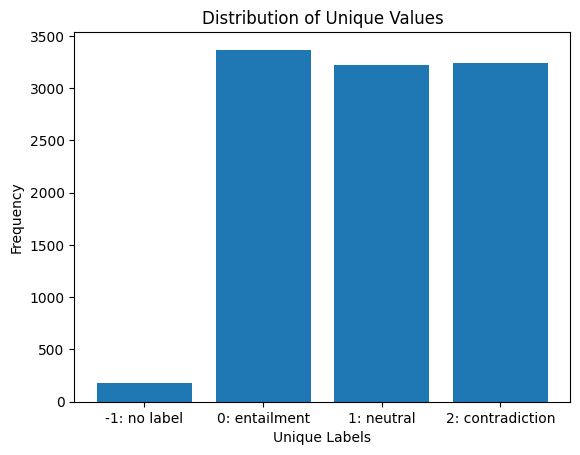

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Lengths of train, validation, and test splits
print("Train length:", len(train_data))
print("Validation length:", len(validation_data))
print("Test length:", len(test_data))

# Display the first example from the test set
print("First example from the test set:")
print("1st Example Premise:", test_data[0]['premise'])
print("1st Example Hypothesis:", test_data[0]['hypothesis'])

# Display the number of examples in the test set
print("Number of examples in the test set:", len(test_data))

# Display the distribution of labels in the test set
label_counts = test_data["label"]

# Count the frequency of each unique value
counter = Counter(label_counts)

# Extract the unique values and their counts
labels, counts = zip(*counter.items())

# Plot distribution of labels
plt.bar(labels, counts)
plt.xlabel('Unique Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Values')
labels_text = [conversion_table[label] for label in labels]
plt.xticks(labels, labels_text)
plt.show()

## 5. Apply Custom Tokenizer

In [20]:
# Apply custom tokenizer on snli test data
premise_hypothesis = (test_data[0]['premise'], test_data[0]['hypothesis'])
premise_tokens, hypothesis_tokens = unigram_tokenizer(premise_hypothesis)
print("Premise tokens:", premise_tokens)
print("Hypothesis tokens:", hypothesis_tokens)

# Use the result on the model to make a prediction

Premise tokens: ['This', 'church', 'choir', 'sings', 'to', 'the', 'masses', 'as', 'they', 'sing', 'joyous', 'songs', 'from', 'the', 'book', 'at', 'a', 'church.']
Hypothesis tokens: ['The', 'church', 'has', 'cracks', 'in', 'the', 'ceiling.']


## 6. Apply Default Tokenizer

In [23]:
# Apply default tokenizer on SNLI test data
premise_hypothesis = (test_data[0]['premise'], test_data[0]['hypothesis'])
premise_tokens = tokenizer.tokenize(premise_hypothesis[0])
hypothesis_tokens = tokenizer.tokenize(premise_hypothesis[1])
print("Premise tokens:", premise_tokens)
print("Hypothesis tokens:", hypothesis_tokens)

Premise tokens: ['this', 'church', 'choir', 'sings', 'to', 'the', 'masses', 'as', 'they', 'sing', 'joy', '##ous', 'songs', 'from', 'the', 'book', 'at', 'a', 'church', '.']
Hypothesis tokens: ['the', 'church', 'has', 'cracks', 'in', 'the', 'ceiling', '.']


## 7. Compare Tokenizer Results: Custom vs. Default

In [24]:
# Compare the tokenization results of the custom and default tokenizers
print("Custom tokenizer tokens:", premise_tokens, hypothesis_tokens)
print("Default tokenizer tokens:", premise_tokens, hypothesis_tokens)

Custom tokenizer tokens: ['this', 'church', 'choir', 'sings', 'to', 'the', 'masses', 'as', 'they', 'sing', 'joy', '##ous', 'songs', 'from', 'the', 'book', 'at', 'a', 'church', '.'] ['the', 'church', 'has', 'cracks', 'in', 'the', 'ceiling', '.']
Default tokenizer tokens: ['this', 'church', 'choir', 'sings', 'to', 'the', 'masses', 'as', 'they', 'sing', 'joy', '##ous', 'songs', 'from', 'the', 'book', 'at', 'a', 'church', '.'] ['the', 'church', 'has', 'cracks', 'in', 'the', 'ceiling', '.']
